# **PCA**







#Step 1 : import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [2]:
cancer_DF = load_breast_cancer(as_frame= True)
df = cancer_DF.frame

#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [3]:
X = df[cancer_DF['feature_names']]
y = df.target
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 0)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_pro = scaler.fit_transform(x_train)
x_test_pro = scaler.transform(x_test)

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




<h3> Applying it in a faster way

In [ ]:
pca = PCA(n_components)
pca_train = pca.fit_transform(x_train_pro)
pca_test  = pca.transform(x_test_pro)

          PC1       PC2
0   -3.039161  1.106670
1   -2.282314  0.400452
2   -1.084095 -1.995444
3   -2.561100  0.179338
4   -2.848305 -1.017616
..        ...       ...
450  0.081023 -3.420671
451  6.513019  7.996828
452 -3.170461  0.516009
453 -5.611046 -0.538805
454 -1.016371  1.395352

[455 rows x 2 columns]


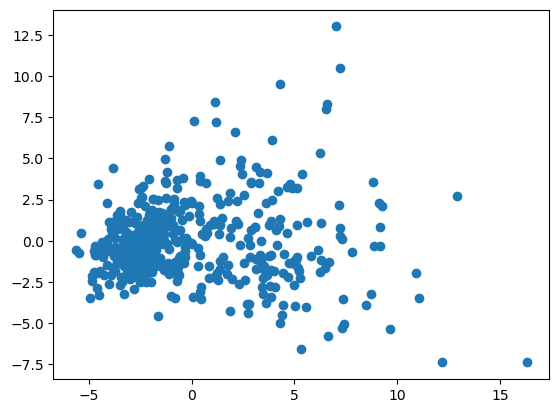

In [5]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components)
pca.fit(x_train_pro)
x_pca = pca.transform(x_train_pro)

df_pca_train = pd.DataFrame(x_pca,
                       columns=['PC{}'.format(i+1)
                       for i in range(n_components)])

print(df_pca_train)
plt.scatter(df_pca_train['PC1'],df_pca_train['PC2'])

#Step 6: Fitting Logistic Regression To the training set




In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty = 'l2')
log_reg.fit(df_pca_train,y_train)

LogisticRegression()

#Step 7: Predicting the train set result




In [ ]:
y_pred_train = log_reg.predict(df_pca_train)
print(f'Logistic Regression accuracy:{accuracy_score(y_train,y_pred_train)} ')

Logistic Regression accuracy:0.967032967032967 


#Step 8: Making the confusion matrix




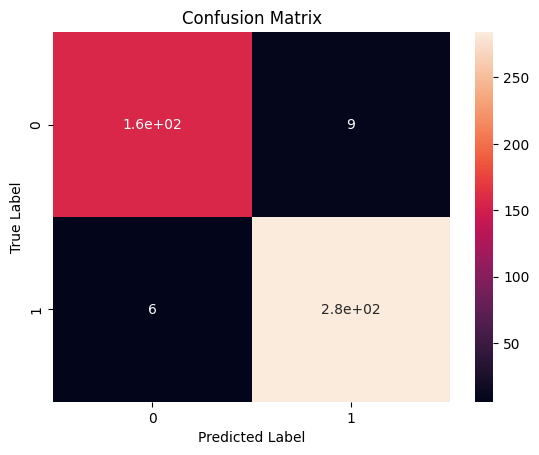

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Step 9: Predicting the testing set result




In [ ]:
y_pred_test = log_reg.predict(df_pca_test)
print(f'Logistic Regression accuracy:{accuracy_score(y_test,y_pred_test)} ')

Logistic Regression accuracy:0.9035087719298246 


#Step 10: Visualizing the Test set results




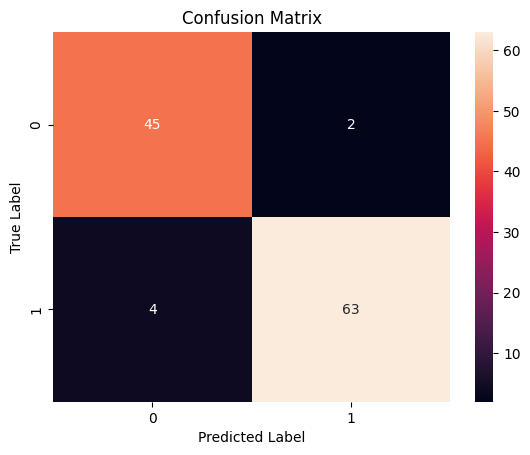

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#**Well Done :)**
Now let's practice!